In [1]:
import os
import matplotlib.pyplot as  plt
import pandas as pd


### 1: Import data

In [3]:
path = '/content/P1/'
# List file in the folder Sales Reporting
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        all_length.append(len(df1.index))

df = result
df.to_csv('anualSales2019.csv',index=False)
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


### 2. Processing Data

In [4]:
df['Month'] = df['Order Date'].str.slice(start=0,stop=2,step=1)

# Extract unique values in Month Column
set(df['Month'])

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 'Or',
 nan}

### 2.1. Get rid of 'NaN' and 'Or' value

In [5]:
df = df.dropna(how='all') # Remove NaN values
df = df[df['Month'] != 'Or'] # Remove Or values
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


### 3. Reporting

#### 3.1. What was the best month for sales? How much was earned

In [7]:
# Convert Format 
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast='integer')
df['Price Each']       = pd.to_numeric(df['Price Each'],downcast='float')

In [9]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4,'Sales',moving_column)
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.950000,23.900000,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.950000,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.990005,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.950000,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [10]:
# The largest sales
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

# The month with largest sales
max_value = sales_value.max()
for month,sales in sales_value.items():
    if sales == max_value:
        print (f'The best month for sales is {month} with {sales}')


The best month for sales is 12 with 4613443.5


Why 12 is the best month?
- Holiday season (eg. Christmans, New Year, etc)
- New launches

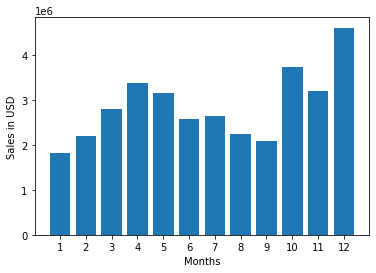

In [11]:
# Visualization for the best
months = range(1,13)
plt.bar(x = months ,height = sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### 3.2. What city has the best sales?

In [12]:
city = lambda address: address.split(',')[1]
df['City'] = df['Purchase Address'].apply(city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09,Los Angeles
1,248152,USB-C Charging Cable,2,11.950000,23.900000,09/29/19 10:19,"511 8th St, Austin, TX 73301",09,Austin
2,248153,USB-C Charging Cable,1,11.950000,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09,Los Angeles
3,248154,27in FHD Monitor,1,149.990005,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09,Seattle
4,248155,USB-C Charging Cable,1,11.950000,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09,Atlanta


In [13]:
city_sales = df.groupby('City').sum()['Sales']
max_value  = city_sales.max()
for city, sales in city_sales.items():
    if city_sales[city] == max_value:
        print (f'The city for the best sale is {city} with {sales}')

The city for the best sale is  San Francisco with 8262204.0


Why San Francisco has the best sales
- Silicon Valley based in SF
- The density of engineers located in SD. data?

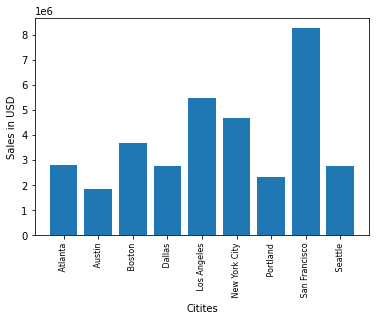

In [14]:
# Visualization for the best
city = [city for city,sales in city_sales.items()]
plt.bar(x = city ,height = city_sales)
plt.xticks(city, rotation=90,size = 8)
plt.xlabel('Citites')
plt.ylabel('Sales in USD')
plt.show()

### 3.3. What time should we display ads to maximize the likelihood of customer's buying product?

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].dtypes

dtype('<M8[ns]')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


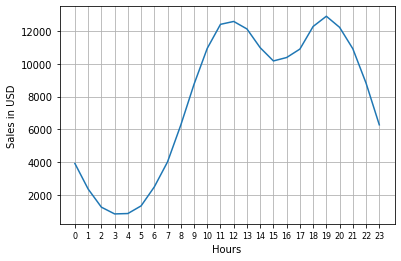

In [16]:
df['Hours'] = df['Order Date'].dt.hour

sale_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sale_value_hours.items()]
print (hours)
# Visualization
plt.plot(hours, sale_value_hours)
plt.grid()
plt.xticks(hours, rotation = 0, size = 8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

The line chart shows that the most number of orders are ordered at 12am and 19pm. We thus run advertisement at 30 minutes before these time 

### 3.4. What products are most often sold together?

In [19]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
20,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15
21,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15
60,248210,iPhone,1,700.000000,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10
61,248210,Lightning Charging Cable,1,14.950000,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10
70,248219,Bose SoundSport Headphones,1,99.989998,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",09,Los Angeles,12


In [ ]:
joinProduct = lambda product: ', '.join(product)

In [23]:
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(', '.join)
df_dup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Product
20,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15,"USB-C Charging Cable, USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15,"USB-C Charging Cable, USB-C Charging Cable"
60,248210,iPhone,1,700.000000,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10,"iPhone, Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.950000,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10,"iPhone, Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.989998,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",09,Los Angeles,12,"Bose SoundSport Headphones, Google Phone"


In [24]:
df_dup = df_dup[['Order ID','All Product']].drop_duplicates()
df_dup.head()

,Order ID,All Product
20,248171,"USB-C Charging Cable, USB-C Charging Cable"
60,248210,"iPhone, Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones, Google Phone"
117,248265,"Vareebadd Phone, Bose SoundSport Headphones"
176,248323,"Google Phone, Bose SoundSport Headphones"


In [25]:
df_dup['All Product'].value_counts()

iPhone, Lightning Charging Cable                                882
Google Phone, USB-C Charging Cable                              856
iPhone, Wired Headphones                                        361
Vareebadd Phone, USB-C Charging Cable                           312
Google Phone, Wired Headphones                                  303
                                                               ... 
Google Phone, Flatscreen TV                                       1
iPhone, Lightning Charging Cable, AAA Batteries (4-pack)          1
Google Phone, USB-C Charging Cable, Lightning Charging Cable      1
iPhone, 27in FHD Monitor                                          1
Vareebadd Phone, Wired Headphones, 27in 4K Gaming Monitor         1
Name: All Product, Length: 366, dtype: int64

### 3.5. What product sold the most? Why do you think it sold the most?

In [31]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
all_products.head()

Product
20in Monitor               4129.0
27in 4K Gaming Monitor     6244.0
27in FHD Monitor           7550.0
34in Ultrawide Monitor     6199.0
AA Batteries (4-pack)     27635.0
Name: Quantity Ordered, dtype: float64

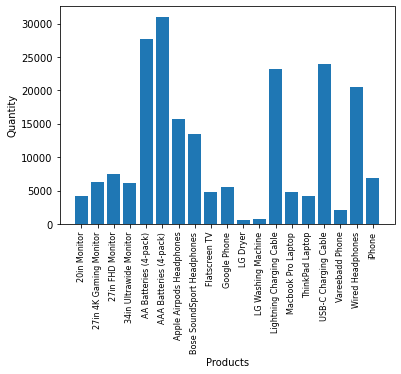

In [29]:
# Visualization
products_ls = [product for product, quant in all_products.items()]
plt.bar(products_ls, all_products)
plt.xticks(products_ls,rotation=90,size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

The line chart shows that the most number of orders are ordered at 12am and 19pm. We thus run advertisement at 30 minutes before these time 

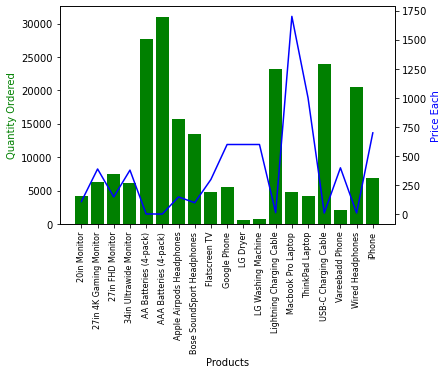

In [32]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

#### 4. Conclusion


*   The quantity of orders increased sharply in the last months of the year, especially in December. This may be because of the special holiday: New Year, Christmas. 
*   Orders are gathered so much at 12am or 19pm when customers takes a break time, so advertisement campaign could be implemented before 30 minutes at this time


*   Both AA Batteries and AAA Batteries are the top items purchased because of their low prices. 
*   Although the prices of LG Dryver and LG Washing Machine are lower than that of Macbook Pro, they are not as popular as Macbook Pro laptop. It is considered that this can be affected by brand.




